In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


  <div style="background-color:; color:Lavender; padding:30px;">
    
<h1 style="text-align: center; color: darkblue;" markdown="1">Investigating the Determinants of Total Income</h1>
    <h3 style="text-align: center; color: darkblue;" markdown="1">ECON 320 </h3>
<h2 style="text-align: center; color: magenta;" markdown="1">Authors: Dylan Parker, Kareem Safieddine, Daniel Nadel, Ethan Murakami</h2>
     </div>

![A Career in Economics](https://alliance.edu.in/blog/wp-content/uploads/2023/03/a-career-in-economics-02-03-2023-1.jpg)

<a class="anchor" id='toc'></a>
# Table of Contents
<hr style="border:1px solid gray">

* [Introduction and Motivation](#intromoti)
* [Literature Review](#litreview)
* [Data](#data)
    - [Data Source](#datasrc)
    - [Variable Inspection](#datainsp)
    - [Data Import](#dataimport)
    - [Data Cleaning](#dataclean)
    - [Distribution by Region](#distregion)
* [Data Comprehension and Visualization](#datavis)
    - [Counts Per Education Level](#hist)
    - [Median Income by Education](#educ)
    - [Gender and Race Proportions](#genraceprop)
    - [Median Income by Sex](#sex)
    - [Regional Distribution](#region) 
    - [Correlation Matrix](#corr)
* [Economic Modeling](#econmodel)
    - [Regression Results](#reg)
    - [Hypothesis Testing](#hyp)
    - [Robustness of Findings](#robust)
    - [Heteroskedasticity Test](#heterotest)
* [Conclusion](#conclusion)
* [References](#references)


<a class="anchor" id='intromoti'></a>
# Introduction and Motivation
<hr style="border:1px solid gray">

The purpose of this project is to investigate how total pre-tax personal income varies with sex, age, race, level of education, hours worked per week, and occupational score. Specifically, we seek to understand how much of total income can be explained by those explanatory variables. Our hypothesis is that all variables have a significant effect on income. We hypothesize that there is a positive impact on income for being male, and, subsequently, a negative impact on income for being female. Moreover, there is a positive impact on income as age increases since this could indicate more experience. We expect a variety of impacts from race, including relative higher income for white individuals and lower income for black individuals. We expect the level of education to have a positive correlation: as education levels increase, income should increase, too. Hours worked per week and occupational score should also have a positive impact on income. Our explained variable will be log of income, which means that unit impacts of our explanatory variables should be expressed in percentage terms. 

Investigating the variation in income is extremely valuable for multiple reasons. The data we are manipulating is extracted from the U.S., so this is pertinent to U.S. citizens. Hence, our results can reveal insights for the quality of life and economic prosperity in the United States. 

First, the variation in income sheds light on the extent of economic inequality within the U.S., and it allows us to get closer to attributing the causes of income inequality. For example, income at the top of the income distribution is 12.6 times higher than the bottom of the distribution (Kollar 2023). By investigating the variation in income, we can understand what the characteristics of the highest earners are, and this can help us close the gap by providing the resources necessary to individuals whose income lie at the bottom of the distribution. 

![Income Inequality](https://www.census.gov/library/stories/2023/09/income-inequality/_jcr_content/root/responsivegrid/responsivegrid_499509805/imagecore_1016285388.coreimg.jpeg/1694521463960/figure-1-income-inequality.jpeg)

Second, identifying the variation in income allows us to identify people who are at risk of falling below the poverty line. In 2022, the poverty rate was 11.5 percent meaning there were around 38 million people in the U.S. who experienced poverty (Shrider and Creamer 2023). By investigating the variation in income, we can take more preemptive and preventive measures to ensure that people do not fall below the poverty line. Moreover, understanding that education and occupational scores have an impact on total income informs us that we should invest more in earlier years of education and push people towards occupations that make more money. 

![Income Variation Across Racial and Ethnic Groups](https://www.pgpf.org/sites/default/files/income-varies-widely-across-racial-and-ethnic-groups-in-the-united-states.jpeg)

Third, examining the variation in income is valuable to policymakers who might use income data to evaluate the efficacy of economic policies. It also informs them on who and what to focus their attention when determining proper economic reform. For instance, understanding that there are discrepancies in total income because of race and gender creates the exigency for governments to overcorrect for pay differences. The Equal Pay act was signed in 1963, yet there are still differences in pay that have not been accounted for (Vagins and Usova 2011). This act was put into law because the government noticed a significant difference in pay on the basis of gender, hence it is reasonable to assume that if discrepancies are determined over race or education level, then the government may find it necessary and useful to invest more time dealing with that. 

![Variation in Per Capita Income](https://www.commerce.gov/sites/default/files/2023-06/variation-per-capita-income.png)

Finally, this information is valuable for the average U.S. citizen who wants to increase their total income. Even if the goal is to increase personal total income instead of alleviating some discriminatory payment gap, these regressions provide the average U.S. citizen the necessary information to increase their total income. For example, knowing how much of an influence your occupation has on your total income may lead you to get higher paying jobs such as psychiatrists who have 389.9% higher incomes over the national median (Hamilton 2023). Or, knowing how much total hours worked explains income may also lead you to work more hours. The information revealed from these regressions can be used to have more agency over your total income. 

Overall, the goal of our project is to provide necessary insights into the economic health of the U.S., assist policymakers in being informed, and increase the well-being of citizens. We believe that the variables we have selected are strong and pertinent to the U.S. population.

<a class="anchor" id='litreview'></a>
# Literature Review
<hr style="border:1px solid gray">

[(Back to Table of Contents)](#toc)

Our hypotheses and overall interest regarding income variation and our chosen explanatory variables are reinforced by existing literature studies that have quantitatively unpacked the individual relationships between income and our variables. With our project, we want to expand on these findings by putting them all together with our regression.

Nobel prize winner Claudia Goldin describes in her research on the gender gap in earnings that women both receive lower wages than men and are generally employed in lesser paying and menial occupations. Her measures of sex-based discrimination determine whether the labor market differentially rewards men and women of similar performance levels, and through the explained portion of the variation, sex discrimination makes up around 60% of the wage gap.

![Earnings](https://imgur.com/puTgiAh.png)

The table (part B) above documents Goldin’s model regressing income on the expected human capital stock of men and women, which is differentiated by gender differences in lifetime labor force participation. The results reveal that a large percentage of difference in earnings is explained by different expectations of future employment, thus insinuating a general belief that the potential for growth in human capital for women is lesser than that of men. While this outlook is bleak, the data is from the 1980s, so we hope to find less discriminatory results in our regression with more modern data.

A study by the U.S. Census Bureau, Center for Economic Studies using IRS tax data measured income inequality and mobility across different ethnicities found that whites and Asians had the highest incomes while blacks, American Indians, and Hispanics were saliently lower earners. Interestingly though, in terms of within-ethnicity measurements, whites and Asians had the largest income inequality and lowest mobility, with the reverse being true for minority groups. Whites were found to have a disproportionately large share of income at the top 10% of the overall income distribution in the study. We look to see if these trends in racial income inequality are observed in the results of our own data, while keeping the point of in-group mobility in mind for potential next steps.

A study by labor economist David Card points out an important distinction in regards to the relationship between education and income, stating that although there is evidence of positive correlation between the two variables, it is difficult to ascertain whether the higher earnings are caused by higher education or if individuals with high expected earning potential choose to pursue higher education. He cites ability bias as an upward bias that influences earning differential between workers of different education. However, other studies have shown the influence of this bias to be small, leading to the conclusion that education’s effect on income is generally understated by most literature. This study affirms our hypothesis that education should be positively correlated with income, and the section on ability bias’s small magnitude affirms that our correlation coefficient in our data is likely to be accurate.


In [2]:
# Import your packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import scipy.stats as stats
pd.options.display.float_format = '{:.3f}'.format

from IPython.display import display
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor

<a class="anchor" id='data'></a>
# Data
<hr style="border:1px solid gray">

[(Back to Table of Contents)](#toc)

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<a class="anchor" id='datasrc'></a>
## A. Data Source

Our data comes from IPUMS USA. This is a national database with a litany of variables collected from census and survey data. The data provided in IPUMs is codified in such a way that it makes analyzing trends and particular variables extremely easy. Data in IPUMs consists of census data from 1790 to 2010 and American Community Surveys data from 2000 to 2023. The population in question is U.S. citizens, which makes a U.S. database extremely valuable when analyzing the variables in question. 
<a class="anchor" id='intromoti'></a>

<a class="anchor" id='datainsp'></a>
## B. Variable Inspection

Here is an in depth description of the variables we will be using, and their relevance in this investigation of total income. This is prior to cleaning up the variables to give a starting image of the variables and comment on any important characteristics of the variables in question as they are presented in IPUMS. A quick description of the variables post cleaning will appear at the end of the data section. We used the years 2006, 2011, 2016, and 2021 when collecting our data. 

The dependent variable is INCTOT which represents the total pre-tax personal income from the last 12 months for a respondent. Total income is expressed in dollars, and the IPUMs database adjusts this for inflation over time. The database uses CPI adjustment factors to account for inflation. After data cleaning, we adjust total income by taking the log of the given value to account for percentage change in income which alleviates any further concerns about adjusting for inflation. 

We chose age, race, and sex to investigate structural factors that influence income. These are the three primary factors that individuals in the U.S. have to deal with: their age, their racial identity, and their sexual identity. They all play a large role in how individuals are socialized and how they are treated in the workspace. But, in order for us to attribute income differences to individual factors, we must also take into account  things like occupation score, education level, and number of hours worked. If differences in income persist even after accounting for three large external factors, it informs us that there are discriminatory pressures in play. 

The explanatory variables are listed below. 
* **SEX**: Reports whether the person was male or female. This does not account for individuals who do not classify as either gender, for example nonbinary or pansexual individuals, though it is likely that those individuals would have reported their sex at birth for census/survey purposes. Sex is a very prominent variable when investigating variation in income, debates about the gender pay gap have been around for an extremely long time, and the issue has yet to be completely resolved. 
* **AGE**: Reports the person’s age in years as of the last birthday. 
* **RACE**: Race describes the respondents self reported race as per their self identification or their identification in the Census Bureau. Our data uses race as a dummy variable. The effect you see in the regressions ran below compares the impact of race relative to being white where T2 is Black, T3 is Asian, and T4 is other. 
* **EDUCD**: EDUCD is the detailed description of the EDUC variable in IPUMS. We used this variable over EDUC alone because EDUC did not describe specific details. For example, grade 12 data did not indicate if the person graduated. Year 3 of college data did not indicate if a person graduated. EDUCD accounts for this. 
* **OCCSCORE**: This variable is a value that assigns occupational income scores to each occupation. The way IPUMS constructed this variable is described in depth at https://usa.ipums.org/usa/chapter4/chapter4.shtml#occscore. It assigns a value that represents the median total income of each occupation. 
* **UHRSWORK**: Estimated hours per week the respondent usually worked.

<a class="anchor" id='dataimport'></a>
## C. Data Import

In [4]:
# Import data
acs = pd.read_csv("/Users/danielnadel/Desktop/Econ320/usa_00005.csv")
acs = acs[["SEX","AGE","RACE","EDUCD","UHRSWORK","INCTOT","OCCSCORE","PWSTATE2"]]
acs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12490844 entries, 0 to 12490843
Data columns (total 8 columns):
 #   Column    Dtype
---  ------    -----
 0   SEX       int64
 1   AGE       int64
 2   RACE      int64
 3   EDUCD     int64
 4   UHRSWORK  int64
 5   INCTOT    int64
 6   OCCSCORE  int64
 7   PWSTATE2  int64
dtypes: int64(8)
memory usage: 762.4 MB


<a class="anchor" id='dataclean'></a>
## D. Data Cleaning

In [5]:
# Data clean-up

# Drop observation with income 999999 because they are missing or NA
st = acs[acs["INCTOT"]==999999]
acs = acs.drop(st.index)
# Drop observations with negative or zero incomes
st = acs[acs["INCTOT"]<=0]
acs = acs.drop(st.index)
# Drop individuals under 18 years old
st = acs[acs["AGE"]<18]
acs = acs.drop(st.index)
# Drop individuals over 67 years old
st = acs[acs["AGE"]>67]
acs = acs.drop(st.index)

def frace(x):
    # White
    if x==1:
        return 1
    # Black
    elif x==2:
        return 2
    # Asian
    elif x==4 or x==5 or x==6:
        return 3
    # Other
    elif x==3 or x==7 or x==8 or x==9:
        return 4
acs['RACE'] = acs['RACE'].apply(frace)

#Dummy variables for Race
is_white = acs['RACE']==1
acs['ISWHITE'] = is_white
acs.replace({False: 0, True: 1}, inplace=True)

#Dummy variables for Sex
is_female = acs['SEX']==2
acs['SEX'] = is_female
acs.replace({False: 0, True: 1}, inplace=True)

#Clean up state data

#Drop observations outside of the United States
st = acs[acs["PWSTATE2"]>56]
acs = acs.drop(st.index)
#Set observations which have N/A to pd.NA so they can be omitted from regional comparisons
acs.PWSTATE2[acs.PWSTATE2 == 0] = pd.NA

#Drop observations with N/A
st = acs[acs["OCCSCORE"]==0]
acs = acs.drop(st.index)

def feduc(x):
    # No High School Degree or Less
    if x<=61:
        return 1
    # High School Degree or Equivalent
    elif x==62 or x==63 or x==64:
        return 2
    # Some College but No Degree
    elif x==65 or x==71:
        return 3
    # Associate's Degree
    elif x==81:
        return 4
    # Bachelor's Degree
    elif x==101:
        return 5
    # Degree Higher than Bachelor's
    elif x==114 or x==115 or x==116:
        return 6
acs['EDUCD'] = acs['EDUCD'].apply(feduc)

# Add log(inctot) to the dataset
acs['LINCTOT'] = np.log(acs['INCTOT'])

acs.describe()

,SEX,AGE,RACE,EDUCD,UHRSWORK,INCTOT,OCCSCORE,PWSTATE2,ISWHITE,LINCTOT
count,6415978.000,6415978.000,6415978.000,6415978.000,6415978.000,6415978.000,6415978.000,5272601.000,6415978.000,6415978.000
mean,0.484,42.561,1.493,3.442,36.465,49157.684,28.172,27.715,0.755,10.218
std,0.500,13.858,0.969,1.564,15.492,63132.092,10.753,15.993,0.430,1.256
min,0.000,18.000,1.000,1.000,0.000,1.000,3.000,1.000,0.000,0.000
25%,0.000,31.000,1.000,2.000,30.000,15600.000,21.000,12.000,1.000,9.655
50%,0.000,43.000,1.000,3.000,40.000,33800.000,25.000,27.000,1.000,10.428
75%,1.000,54.000,1.000,5.000,40.000,60000.000,36.000,42.000,1.000,11.002
max,1.000,67.000,4.000,6.000,99.000,1532000.000,80.000,56.000,1.000,14.242


Not all measures of central tendency are relevant for categorical variables, though looking at the mean can give us information about how the data is distributed. The highest year in our data is 2021, the lowest year is 2006. The maximum age is 67 years old, and the minimum age is 18. The mean age in our data is 42 years old. The median race is white, potentially indicating that most of the respondents are white. Most respondents achieved at least some college but no degree. The maximum number of hours per week that a respondent usually worked was 99 and the minimum was 1. The median hours worked was 40, and the average was 39.7. The mean occupational score was 27.8. The average income was 54,583 dollars.

| 0  | INCTOT   | Total Pre-Tax Personal Income Last 12 Months (Dependent Variable, All Other Variables are Independent Variables)                                                                                                                                                                        |
|----|----------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1  | SEX      | Person's Gender; 0 = Male, 1 = Female |
| 2  | AGE      | Person's Age in Years as of Last Birthday. Working age population with a minimum of 18 years and a maximum of 67 years |
| 3  | RACE     | Individual's self-identified racial background. Split into 4 groups: 1 = White, 2 = Black, 3 = Asian, 4 = Other |
| 4  | EDUCD    | Highest level of education completed by respondents, indicating their overall educational attainment. EDUCD stands for education detailed which includes information on the highest degrees attained by each respondant. Split into 6 categories: 1 = No High School Degree or Less, 2 = High School Diploma, 3 = Some College No Degree, 4 = Associate's Degree, 5 = Bachelor's Degree, 6 = Degree Higher than Bachelor's |
| 5 | UHRSWORK  | Number of hours per week that the respondent usually worked | 
| 6  | OCCSCORE | Occupational Income Score assigns a numeric score to each occupation based on the median total income (in hundreds of 1950 dollars) of all individuals in that occupation  |
| 7  | PWSTATE2 | Indicates the state where the respondent's main workplace is located, including instances of work conducted abroad |                                                           

<a class="anchor" id='distregion'></a>
## E. Distribution by Region

In [6]:
# Filtering states into regions with regions being: 1 for Northeast, 2 for Midwest, 3 for South, 4 for West
def fregion(x):
    if x==9:
        return 1
    elif x==23:
        return 1
    elif x==25:
        return 1
    elif x==33:
        return 1
    elif x==44:
        return 1
    elif x==50:
        return 1
    elif x==34:
        return 1
    elif x==36:
        return 1
    elif x==42:
        return 1
    elif x==18:
        return 2
    elif x==17:
        return 2
    elif x==20:
        return 2
    elif x==26:
        return 2
    elif x==39:
        return 2
    elif x==55:
        return 2
    elif x==19:
        return 2
    elif x==27:
        return 2
    elif x==29:
        return 2
    elif x==31:
        return 2
    elif x==38:
        return 2
    elif x==46:
        return 2
    elif x==10:
        return 3
    elif x==11:
        return 3
    elif x==12:
        return 3
    elif x==13:
        return 3
    elif x==24:
        return 3
    elif x==37:
        return 3
    elif x==45:
        return 3
    elif x==51:
        return 3
    elif x==54:
        return 3
    elif x==1:
        return 3
    elif x==21:
        return 3
    elif x==28:
        return 3
    elif x==47:
        return 3
    elif x==5:
        return 3
    elif x==22:
        return 3
    elif x==40:
        return 3
    elif x==48:
        return 3
    elif x==4:
        return 4
    elif x==8:
        return 4
    elif x==16:
        return 4
    elif x==35:
        return 4
    elif x==30:
        return 4
    elif x==49:
        return 4
    elif x==32:
        return 4
    elif x==56:
        return 4
    elif x==2:
        return 4
    elif x==6:
        return 4
    elif x==15:
        return 4
    elif x==41:
        return 4
    elif x==53:
        return 4
acs['REGIONS'] = acs['PWSTATE2'].apply(fregion)
# Making region1 a categorical variable
acs['REGIONS'] = acs['REGIONS'].astype('category')

<a class="anchor" id='datavis'></a>
# Data Comprehension & Visualization
<hr style="border:1px solid gray">

[(Back to Table of Contents)](#toc)

In [7]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [8]:
# Pie Chart
def pieChart(data, column, labels, title="Pie Chart"):
    """
    Create a pie chart.

    Parameters:
    - labels (list): List of labels for each wedge.
    - sizes (list): List of sizes of each wedge.
    - title (str): Title of the pie chart. Default is "Pie Chart".
    """
    sizes = data[column].value_counts()
    
    # Create a pie chart
    plt.pie(sizes, autopct='%1.1f%%', startangle=140)

    # Set aspect ratio to be equal, ensuring that the pie is drawn as a circle.
    plt.axis('equal')
    
    
    plt.legend(labels)
    plt.title(title)
    plt.show()

<a class="anchor" id='hist'></a>
## A. Counts Per Education Level

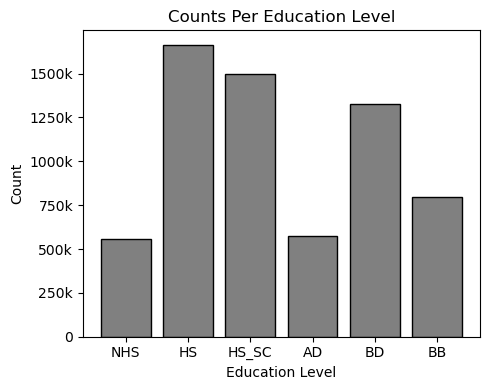

In [9]:
# Calculate the counts for each education level
educd_counts = acs['EDUCD'].value_counts().sort_index()
plt.figure(figsize=(5, 4))
# NHS: No highschool degree, HS: Highschool degree, HS_SC: Highschool degree, some college experience
# AD: Associate's degree, BD: Bachelor's degree, HB: Higher than Bachelor's Degree
categories = ['NHS', 'HS', 'HS_SC', 'AD', 'BD', 'BB']
plt.bar(educd_counts.index, educd_counts.values, color='grey', edgecolor='black', tick_label=categories)

# Set the y-axis to go by 250k units up to 1.5 million
plt.yticks(np.arange(0, 1500001, 250000), ['0', '250k', '500k', '750k', '1000k', '1250k', '1500k'])

# Set labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Counts Per Education Level')

plt.tight_layout()
plt.show()

This bar graph allows us to visualize the respondent count per education level for our data set. Just under 500,000 people had no highschool degree. Just above 1.25 million people had at least a high school degree. Just under 1.25 million people had a high school degree and some college experience, indicating that they may have dropped out. The value for HS_SC makes sense given that it could explain the amount of people from high school who attempted college and dropped out for ideological or financial reasons. Around 500,000 people acquired an associate’s degree. Just under 1.25 million people acquired a bachelor's degree. Just under 750,000 people acquired a degree higher than a bachelors. 

The data skews towards high school degrees or bachelor degrees, indicating that most individuals either graduated high school and then immediately entered the labor force, or they entered the labor force right after graduating with a Bachelor’s. 

<a class="anchor" id='educ'></a>
## B. Median Income by Education

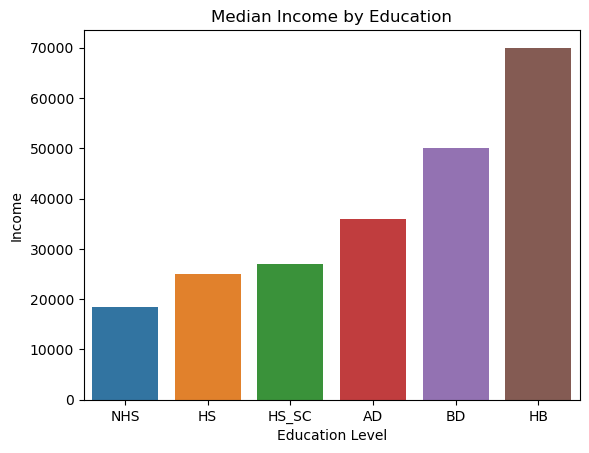

In [10]:
# Barplot
bar = sns.barplot(data=acs, x='EDUCD', y='INCTOT', estimator=np.median, ci=None)


bar.set(title='Median Income by Education', xlabel='Education Level', ylabel='Income')
bar.set(xticklabels=['NHS', 'HS', 'HS_SC', "AD", "BD", "HB"])

plt.show()

This bar graph allows us to visualize the distribution of median income by education. The distribution of median income by education already reveals a relevant pattern: the higher the level of education, the higher the median income. This gives insight on what the regression may describe about total income. The lowest median income is for no high school degree at around 20,000. The highest median income is for higher than a bachelor degree at 70,000. Individuals with a bachelor's degree had a median income of around 50,000. Individuals who graduated high school had a median income of around 30,000. There is an extremely small difference between highschool and high school and some college. Those who graduated high school and had some college experience have a median income just above 30,000. Respondents with associates degrees had a median income of around 40,000.

<a class="anchor" id='genraceprop'></a>
## C. Gender and Race Proportions

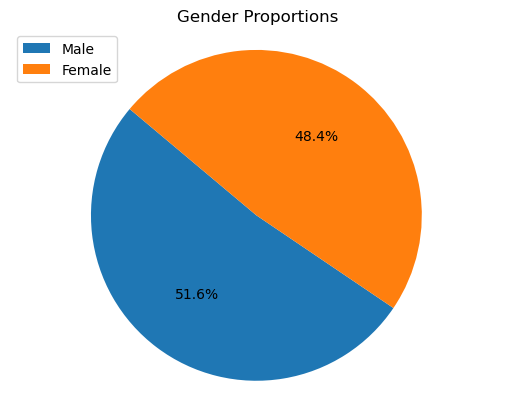

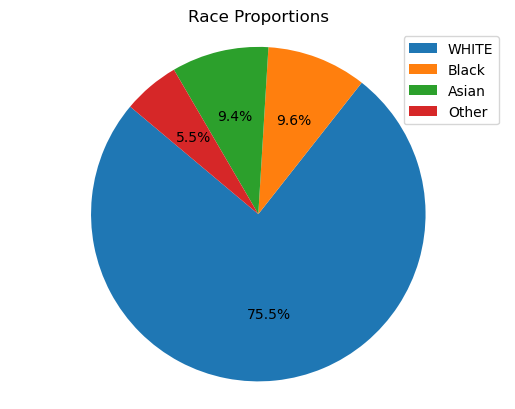

In [11]:
# Gender pie chart
pieChart(acs, "SEX", ["Male", "Female"], "Gender Proportions")

# Race pie chart
pieChart(acs, "RACE", ["WHITE", "Black", "Asian", "Other"], "Race Proportions")

The pie charts allow us to visualize the distribution in race and gender for the respondents in our data. The gender proportions indicate that most respondents were male (52.3%) than female (47.7%). Though the amount of male respondents does not significantly encapsulate the amount of female respondents, indicating a reasonable division. Surprisingly, within the distribution of men and women, most respondents were white (76%) followed by black (9.6%), Asian (8.7%), and other (5.7%). The amount of white respondents significantly overwhelms the amount of black, asian, and other race respondents. 

<a class="anchor" id='sex'></a>
## D. Median Income by Sex

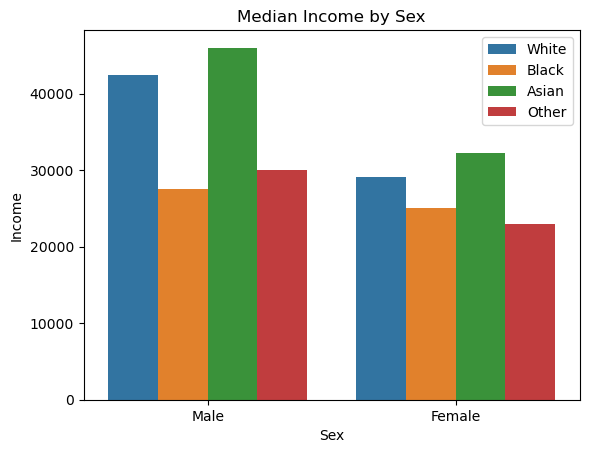

In [12]:
# Barplot
bar1 = sns.barplot(data=acs, x='SEX', y='INCTOT', hue = 'RACE', estimator=np.median, ci=None)
bar1.set(title='Median Income by Sex', xlabel='Sex', ylabel='Income')
bar1.set(xticklabels=["Male", "Female"])
plt.legend(['White', 'Black', 'Asian', 'Other'])
plt.show();

This bar graph reveals the distribution in median income by sex. It further subdivides this distribution by race, indicated by the color of the bar. Asian Males have the highest median income at around 50,000, followed closely by white males at just under 50,000, whereas black males have the lowest median income just above 30,000. Asian females also had the highest median income just under 40,000 with a more considerable gap between Asian and white females who had a median income closer to above 30,000. Nonetheless, black females were also the lowest median income at below 30,000. For each respective race, median income was higher for males than females. Male incomes were higher than all female income except for black and other males having lower incomes than Asian females.


<a class="anchor" id='region'></a>
## E. Regional Distribution

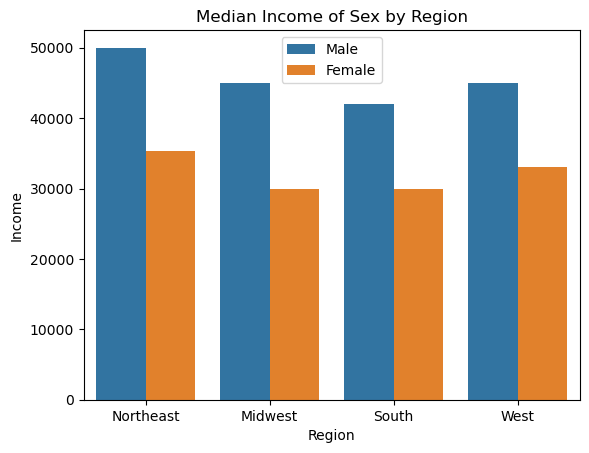

In [13]:
# Barplot 2
bar2 = sns.barplot(data=acs, x='REGIONS', y='INCTOT', hue = 'SEX', estimator=np.median, ci=None)
bar2.set(title='Median Income of Sex by Region', xlabel='Region', ylabel='Income')
bar2.set(xticklabels=['Northeast', 'Midwest', 'South', 'West'])
plt.legend(['Male', 'Female'])
plt.show();

We examined income distribution between males and females between four different regions in the United States (Northeast, South, West, Midwest) determined by the census. The bar graph displays that in all four regions, men had higher median income than women, and the degree to which their incomes were higher was relatively the same between all regions. These results prove the existence of a national sex-based wage gap as our hypothesis and literature review suggest. The fact that the magnitude of this gap is consistent across all regions is concerning, as this means that regional influence is essentially a nonfactor, making this gap purely based on an accumulation of discriminatory factors. 

<a class="anchor" id='corr'></a>
## F. Correlation Matrix

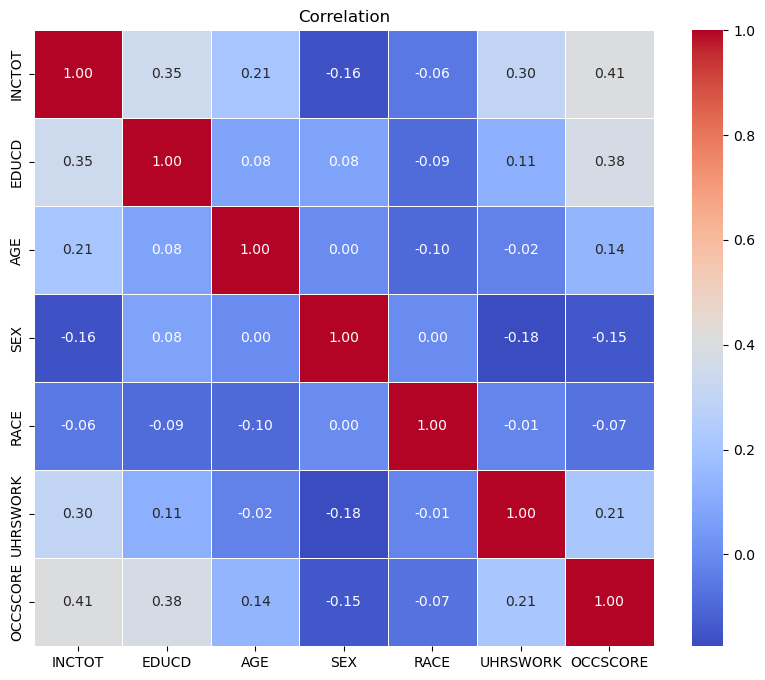

In [14]:
# Correlation matrix
corr_matrix = acs[["INCTOT","EDUCD", "AGE", "SEX", "RACE", "UHRSWORK", "OCCSCORE"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation")
plt.show()

The correlation matrix highlights important details that confirm some of the assumptions from our hypothesis, but also raises more questions. Firstly, it is a point of note that none of the correlation coefficients go over 0.50, meaning every variable is either weakly or moderately weakly correlated with income. OCCSCORE having the highest magnitude relative to our other variables at 0.41 is expected, as it is measured by median income, though we expected the strength of correlation to be higher. SEX has a negative correlation of -0.16, meaning that there is a weak, negative relationship between being a female and an individual’s income. RACE has a negative correlation of -.06, and while this is quite weak, it backs up our hypothesis that nonwhite individuals have lesser income than whites. The weakness of the relationship could be biased by Asians being nonwhite. Age (0.21), hours worked (0.30), and education (0.35) all have moderately positive relationships with income, which makes sense, as individuals higher seniority and advanced degrees typically hold higher positions in a company’s hierarchy with more salary, and the more hours one works, the more one gets paid typically.

<a class="anchor" id='econmodel'></a>
# Economic Modeling
<hr style="border:1px solid gray">

[(Back to Table of Contents)](#toc)

In [15]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Our goal is to find out if each of the selected explanatory variables have a positive or negative impact on total income. We also want to discover if the variables are significant in explaining the variation in total income. 

Our basic regression model has log(inctot) as the y variable and we aim to measure the betas on sex, educd, age, race, uhrswork, and occscore. 

Here are our initial hypotheses: 
* All explanatory variables are significant in explaining the variation in total income. 
* Being a woman has a negative effect on total income compared to males.
* Having a high education level leads to a larger total income.
* Being older leads to a larger total income.
* Relative to being white, black individuals have lower total incomes, asian individuals have higher total incomes, and other races have higher total incomes. 
* Higher hours worked leads to a larger total income. 
* A higher occupation score leads to a larger total income.


$$log(INCTOT)=\beta_0 + \beta_1*SEX + \beta_2*EDUCD + \beta_3*AGE + \beta_4*RACE + \beta_5*UHRSWORK + \beta_6*OCCSCORE + \mu$$

<a class="anchor" id='reg'></a>
## A. Regression Results

We run 6 regressions, with each regression adding an additional explanatory variable in order to analyze how the impact of each variable changes amongst other explanatory variables. The first regression has sex as the explanatory variable. The second has sex and educd as the explanatory variables. The third has sex, educd, and age. The fourth has sex, educd, age, and race. The fifth has sex, educd, age, race, and hours worked. The final regression has all 6 variables: sex, educd, age, race, hours worked, and occupation score. 

In [16]:
m1 = smf.ols(formula = "LINCTOT ~ SEX", data = acs).fit()
m2 = smf.ols(formula = "LINCTOT ~ SEX + EDUCD", data = acs).fit()
m3 = smf.ols(formula = "LINCTOT ~ SEX + EDUCD + AGE", data = acs).fit()
m4 = smf.ols(formula = "LINCTOT ~ SEX + EDUCD + AGE + C(RACE)", data = acs).fit()
m5 = smf.ols(formula = "LINCTOT ~ SEX + EDUCD + AGE + C(RACE) + UHRSWORK", data = acs).fit()
m6 = smf.ols(formula = "LINCTOT ~ SEX + EDUCD + AGE + C(RACE) + UHRSWORK + OCCSCORE", data = acs).fit()

In [17]:
#view the results using a stargazer table
st = Stargazer([m1, m2, m3, m4, m5, m6])
st.covariate_order(['Intercept','SEX', 'EDUCD', 'AGE', 'C(RACE)[T.2]','C(RACE)[T.3]', 'C(RACE)[T.4]', 'UHRSWORK', 'OCCSCORE'])
st.custom_columns(['Model 1','Model 2','Model 3','Model 4','Model 5','Model 6'],[1,1,1,1,1,1])
HTML(st.render_html())

**Model 1:** The impact of sex is in line with our hypothesis - being a woman has a negative impact on total income and this estimated effect is significant.

**Model 2:** The impact of sex and educd in model 2 is in line with our hypotheses. Being female has a negative impact on total income, and higher education levels have a positive impact on total income. These estimated effects are significant. 

**Model 3:** The impact of sex, educd, and age is in line with our hypotheses and the estimated effects are significant. It is notable that the impact of age is only .026 which is very small relative to the impacts of other explanatory variables.

**Model 4:** The impact of sex, educd, age, and race are in line with our hypotheses. It is notable that being black has the biggest negative impact from the race variables measured. The influence of being Asian may also be explained by educd which is why there is a very small negative influence. All estimated coefficients were significant. 

**Model 5:** The impact of sex, edcud, age, race, and hours worked are in line with our hypotheses. It is notable that when we add hours worked, the influence of being Asian becomes positive. Moreover, the negative impact on total income of being female is reduced by half, and we believe that is because most women work part time jobs and the impact of hours worked captures and accounts for being female. All estimated coefficients were significant. 

**Model 6:** The impact of sex, educd, age, race, hours worked, and occupation score are in line with our hypotheses. This is the final model that accounts for all variables, hence we believe it is the most accurate description of how each variable explains the variation in total income. Being female has a negative impact on total income, though this impact is much smaller than the first 4 regressions because it may be captured by hours worked and occupational score. Education has a positive impact on total income, though this impact is the smallest of the six models because it may be captured by occupation score. The impact of age is small and positive, and it remains relatively similar through all 6 regressions. The impact of race, relative to being white, was negative for being black, positive but small for being Asian, and positive but small for being another race. The impacts of race may be accounted for in hours worked, occupational score, or education. 

Of all models, model six has the highest R squared with those explanatory variables explained 45.5 percent of the variation in total income. 

All variables are statistically significant at the 1 percent level meaning we are 99 percent confident in our results.  

We believe there are several intuitive mechanisms for why each beta and coefficient presented as it did. For sex, the negative coefficient on the sex beta is largely due to wage discrimination for being female, as we discovered in our literature review wage discrimination explains a large portion of the difference between male and female wages. For age, it makes sense that the older you are, the more experience you get, and the more likely you are to get paid more. For race, we have largely seen income distributions skew towards White and Asian populations, moreover black individuals suffer from a lot of structural deficits such as systemic racism, family composition issues, and wage discrimination. For hours worked, it makes sense that the more you work, the more money you will make because of wage accumulation. For occupation score, a higher occupation score implies that the job you have pays more per hour which means that you would have a higher total income. Finally, for education level, the more educated and experienced you are in a certain field garuantees that you get paid more. 

<a class="anchor" id='hyp'></a>
## B. Hypothesis Testing

### Joint significance test
$H_0: \beta_{SEX} = \beta_{EDUCD} = \beta_{AGE} = \beta_{RACE} = \beta_{UHRSWORK} = \beta_{OCCSCORE} = 0$

$H_a$: At least one is different from 0

We tested for joint significance for all 6 betas. Our null hypothesis is that all B(sex) = B(educd) = B(age) = B(race) = B(uhrswork) = B(occscore) = 0 meaning that all 6 betas are not statistically different from 0. Our alternative hypothesis is that at least one of the betas is statistically different from 0. 


In [18]:
# Test for joint significance of the group of variables: EDUCD, 
# AGE, RACE, UHRSWORK, and OCCSCORE, after controlling for SEX

n = acs.shape[0]
acs_ur =smf.ols(formula='LINCTOT ~ SEX + EDUCD + AGE + C(RACE) + UHRSWORK + OCCSCORE', data = acs)
fit_ur = acs_ur.fit()
r2_ur = fit_ur.rsquared
print(f' R2 of unrestricted OLS regression : {r2_ur}\n')

acs_r = smf.ols(formula='LINCTOT ~ SEX', data=acs)
fit_r = acs_r.fit()
r2_r = fit_r.rsquared
print(f' R2 of restricted OLS regression : {r2_r}\n')

fstat = (r2_ur - r2_r)/(1-r2_ur)*(n-7-1)/7 # variables + 1(constant) ==> 5 is the number of restrictions
print(f'fstat: {fstat}\n')

cv = stats.f.ppf(1-0.01, 5, n-7-1) #a=1%, 5 restrictions
print(f'Critical value at 1% with 5 restrictions and 5272592 df = {cv}')

fpval = 1-stats.f.cdf(fstat, 5, n-7-1)
print(f'fpval: {round(fpval,4)}\n')

 R2 of unrestricted OLS regression : 0.4552890065743789

 R2 of restricted OLS regression : 0.02546136194837878

fstat: 723256.7378129541

Critical value at 1% with 5 restrictions and 5272592 df = 3.017257335627021
fpval: 0.0



The F stat is overwhelmingly large, and the p value is extremely small. This means that we reject the null hypothesis that the betas are jointly insignificant, and at least one of the betas is different from 0 and statistically significant. In our group of explanatory variables, this tests concludes that as a whole sex, age, educd, race, hours worked, and occupational score is significant for explaining the variation in total income. 

<a class="anchor" id='robust'></a>
## C. Robustness of Findings

In [19]:
# estimate original model
reg = smf.ols(formula='LINCTOT ~ SEX + EDUCD + AGE + C(RACE) + UHRSWORK + OCCSCORE', data = acs)
results_default = reg.fit()

# estimate model with White SE:
results_white = reg.fit(cov_type='HC0')

# estimate model with refined White SE:
results_refined = reg.fit(cov_type='HC3')

# show result
# show in stargazer
models = Stargazer([results_default,results_white,results_refined])
st.covariate_order(['Intercept','SEX', 'EDUCD', 'AGE', 'C(RACE)[T.2]','C(RACE)[T.3]', 'C(RACE)[T.4]', 'UHRSWORK', 'OCCSCORE'])
models.custom_columns(['Original Model','Model with White SE','Model with refined White SE'],[1,1,1])
HTML(models.render_html())

After assuming homoskedasticity for the original model and running the other models, the coefficients are all the same and the SE do not change at all. The $R^2$ does not change and they all have very high F-statistic values. Implies that the results of our model are generally robust.

<a class="anchor" id='heterotest'></a>
## D. Heteroskedasticity Test

$$ H_0: E(u|X)=\Phi^2$$

$$ H_a: E(u|X)\neq\Phi^2$$

In [20]:
# BP test
test = sms.het_breuschpagan(results_default.resid, results_default.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print('B-P Test')
display(pd.DataFrame(lzip(labels,test)))

# White test standard version 1 
result_white_predictions = sm.stats.diagnostic.het_white(results_default.resid, results_default.model.exog)
print('White Test (version 1)')
display(pd.DataFrame(zip(labels, result_white_predictions)))

# White test version 2 
# create the data with 
X_wh = pd.DataFrame({'const': 1, 'fitted_reg': results_default.fittedvalues,
                     'fitted_reg_sq': results_default.fittedvalues ** 2})
result_white_predictions = sm.stats.diagnostic.het_breuschpagan(results_default.resid, X_wh)
print('White Test (Version 2)')
display(pd.DataFrame(lzip(labels,result_white_predictions)))

B-P Test


,0,1
0,LM Statistic,97775.525
1,LM-Test p-value,0.000
2,F-Statistic,12411.060
3,F-Test p-value,0.000


White Test (version 1)


,0,1
0,LM Statistic,284317.557
1,LM-Test p-value,0.000
2,F-Statistic,8040.520
3,F-Test p-value,0.000


White Test (Version 2)


,0,1
0,LM Statistic,135833.398
1,LM-Test p-value,0.000
2,F-Statistic,69385.639
3,F-Test p-value,0.000


The results of all three of the tests we ran (Breusch-Pagan and both versions of White) imply the existence of heteroskedasticity in our model, as the p-values for each test were statistically equivalent to zero, meaning that we reject the null hypothesis that there is homoscedasticity. This means that our estimators are not BLUE. Although our estimators are not biased or inconsistent, they are not “best”, meaning that our OLS estimators had suboptimal efficiency. In other words, there are other variables we could have added to get a more restricted, smaller variance in our results.

<a class="anchor" id='conclusion'></a>
# Conclusion
<hr style="border:1px solid gray">

[(Back to Table of Contents)](#toc)

The purpose of our study is to determine, of the explanatory variables we have selected, how much of the variation in total income can be explained. We believe that the variables we selected are very pertinent to the diversity in the U.S population, and they play a large role in the determination of total income. For example, discussions about sex, age, and race having an influence on total income have long been in headlines and up for debate. Our analysis takes it a step further by taking into account hours worked, education level, and occupational score as determined by the IPUMs database. Our results are important because it isolated the impacts of sex, age, and race in light of other influences such as education level, hours worked, and occupational score. 

After running our regression with all six explanatory variables, we conclude that our initial hypotheses about the influences of each variable are correct. First, all variables are statistically significant at the 1 percent level. The impact of being female is negative on total income. The impact of being Black is negative relative to being white on total income. The impact of being Asian is very slightly positive relative to being white on total income. The impact of other races is slightly positive relative to being white on total income. The impact of hours worked is slightly positive and the impact of occupational score is slightly positive. Including hours worked and occupational score may have reduced the influence of race, sex, and education on total income. Our study ultimately gives insight on the variation in total income from sex, age, race, hours worked, education level and occupation score.

There are limitations in our model. For instance, we do not include wealth as an OLS estimator. If wealth were to be a variable in our model, it would account for the realized gains from investments, 401k’s, property ownership, which would hide potentially significant portions of income, particularly in the older population. A parental education variable could potentially account for potential bias in our education variable, as people raised by educated parents tend to be higher academic performers. Considering that the studies referenced in our literature review used marital status as a statistic, incorporating it into our regression as a dummy variable could provide clearer results as well. Moreover, our sample consisted of data in five year intervals, which could mean that our income was unadjusted for changes in inflation and other dynamic socioeconomic factor shifts over each interval of time. Our race variable is also limited by how loosely the census defines racial groups. For instance, eastern Asians can be quite different from southeastern Asians. Finally, we acknowledged the presence of heteroskedasticity in our model, making our estimators not BLUE. However, as the standard errors of the three tests for heteroskedasticity we ran, we can infer that the outcomes of our regression are robust, meaning that even when certain assumptions are relaxed, like for instance the assumption of homoscedasticity, our main findings stand. Therefore, the results of our t-tests and F-tests and their implications in our analysis hold true.

For future models, it may be beneficial to take into account for wealth since it could be one of the largest explanatory factors for total income that is not dictated by an individual's present conditions. Moreover, it would make sense to have consecutive data instead of data presented in five year intervals to better encompass the macroeconomic conditions and how they influence total income. 

<a class="anchor" id='references'></a>
# References
<hr style="border:1px solid gray">

[(Back to Table of Contents)](#toc)

Deborah J. Vagins, Georgeanne M. Usova. “The Equal Pay Act: You’ve Come a Long Way, Baby (but Not All the Way): ACLU.” American Civil Liberties Union, 25 Oct. 2022, www.aclu.org/news/womens-rights/equal-pay-act-youve-come-long-way-baby-not-all-way. 

Emily A. Shrider And John Creamer. “Poverty in the United States: 2022.” Census.Gov, 12 Sept. 2023, www.census.gov/library/publications/2023/demo/p60-280.html#:~:text=Highlights-,Official%20Poverty%20Measure,and%20Table%20A%2D1). 

Hamilton, Ilana. “What Are the Highest-Paying Jobs in the U.S.?” Forbes, Forbes Magazine, 7 Nov. 2023, www.forbes.com/advisor/education/what-are-the-highest-paying-jobs-in-the-u-s/. 

Kollar, Melissa. “Income Inequality down Due to Drops in Real Incomes at the Middle and Top, but Post-Tax Income Estimates Tell a Different Story.” Census.Gov, 1 Nov. 2023, www.census.gov/library/stories/2023/09/income-inequality.html#:~:text=The%20ratio%20of%20the%2090th,a%206.7%25%20decrease%20from%202021. 

Goldin, Claudia, and Solomon Polachek. “Residual Differences by Sex: Perspectives on the Gender Gap in Earnings.” The American Economic Review, vol. 77, no. 2, 1987, pp. 143–51. JSTOR, http://www.jstor.org/stable/1805442. Accessed 30 Nov. 2023.

Akee, Randall, et al. “Race Matters: Income Shares, Income Inequality, and Income Mobility for All U.S. Races.” Duke University Press, Duke University Press, 3 Apr. 2019, read.dukeupress.edu/demography/article/56/3/999/167998/Race-Matters-Income-Shares-Income-Inequality-and?searchresult=1&searchresult=1&utm_source=TrendMD&utm_medium=cpc&utm_campaign=Demography_TrendMD_1. 

Card, David. “The causal effect of education on earnings.” Handbook of Labor Economics, 1999, pp. 1801–1863, https://doi.org/10.1016/s1573-4463(99)03011-4